In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pygad
!pip install mplcyberpunk
import pygad
import numpy
import pygad
import pygad.nn
import pygad.gann
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
dataset = load_dataset('yh0701/FracAtlas_dataset')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for yh0701/FracAtlas_dataset contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/yh0701/FracAtlas_dataset
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `dat

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
import pandas as pd
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

test_dataset = dataset['test']

test_df = pd.DataFrame(test_dataset)

test_df

,image_id,image,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count,frontal,lateral,oblique,localization_metadata,segmentation_metadata
0,IMG0003704.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,1,0,0,0,0,0,1,1,0,1,0,"{'width': 373, 'height': 454, 'depth': 3}",None
1,IMG0001890.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,1,0,0,0,0,0,0,0,0,1,0,"{'width': 454, 'height': 373, 'depth': 3}",None
2,IMG0000197.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,0,0,0,0,0,0,0,0,1,0,0,"{'width': 2880, 'height': 2304, 'depth': 3}","{'segmentation': [[160.44700622558594, 1488.51..."
3,IMG0002958.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,1,0,0,0,0,0,0,0,0,1,0,"{'width': 373, 'height': 454, 'depth': 3}",None
4,IMG0003174.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,0,0,0,0,0,0,0,0,0,1,0,"{'width': 454, 'height': 373, 'depth': 3}",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,IMG0000221.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,1,0,0,0,0,0,0,0,1,0,0,"{'width': 2304, 'height': 2880, 'depth': 3}","{'segmentation': [[1309.37060546875, 1022.3171..."
609,IMG0000188.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,0,0,0,0,0,0,1,1,1,0,0,"{'width': 2304, 'height': 2880, 'depth': 3}","{'segmentation': [[1329.485595703125, 899.2604..."
610,IMG0003208.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,0,0,0,0,0,0,0,0,0,0,1,"{'width': 373, 'height': 454, 'depth': 3}",None
611,IMG0000506.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0,1,0,0,0,0,0,0,0,0,1,0,"{'width': 373, 'height': 454, 'depth': 3}","{'segmentation': [[225.32894897460938, 183.690..."


In [ ]:
t=test_df
t = t.select_dtypes(include=['number'])
t.corr()

,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count,frontal,lateral,oblique
hand,1.000000,-0.865562,-0.238870,0.197143,0.159616,-0.063594,-0.064256,0.190068,0.149969,0.033896,-0.011913,-0.026771
leg,-0.865562,1.000000,-0.063918,-0.320752,-0.102038,0.083626,0.105979,-0.175407,-0.134494,-0.133022,0.125617,0.054821
hip,-0.238870,-0.063918,1.000000,-0.087839,0.336315,0.070119,-0.094375,0.051714,0.027058,0.209307,-0.186291,-0.045231
shoulder,0.197143,-0.320752,-0.087839,1.000000,0.636762,-0.047198,-0.095418,0.032880,0.000822,0.224359,-0.177126,-0.089773
mixed,0.159616,-0.102038,0.336315,0.636762,1.000000,0.057025,-0.103506,0.097474,0.047336,0.233763,-0.144144,-0.077202
hardware,-0.063594,0.083626,0.070119,-0.047198,0.057025,1.000000,0.058361,0.312948,0.305473,0.082377,-0.018364,-0.009480
multiscan,-0.064256,0.105979,-0.094375,-0.095418,-0.103506,0.058361,1.000000,0.042084,0.149477,0.173458,0.204737,0.086599
fractured,0.190068,-0.175407,0.051714,0.032880,0.097474,0.312948,0.042084,1.000000,0.923798,0.036288,0.065630,-0.062851
fracture_count,0.149969,-0.134494,0.027058,0.000822,0.047336,0.305473,0.149477,0.923798,1.000000,0.071152,0.070700,-0.059766
frontal,0.033896,-0.133022,0.209307,0.224359,0.233763,0.082377,0.173458,0.036288,0.071152,1.000000,-0.697813,-0.343046


In [ ]:
!pip install gplearn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

# Загрузка и предобработка данных
data = test_df  # подставьте путь к вашему файлу данных
X = data.drop('fractured', axis=1)  # замените 'target_column' на фактическое имя вашего столбца целевой переменной
y = data['fractured']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

def initialize_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

def fitness_function(individual, X, y):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0
    num_features = X.shape[1]
    selected_features = [i for i in selected_features if i < num_features]
    if not selected_features:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[:, selected_features], y)
    y_pred = clf.predict(X[:, selected_features])
    return accuracy_score(y, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 0 if individual[i] == 1 else 1
    return individual

population_size = 15
num_generations = 100
mutation_rate = 0.1
population = initialize_population(population_size, X_train.shape[1])
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parents = sorted_population[:population_size // 2]
    children = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append(child1)
        children.append(child2)
    if len(parents) % 2 == 1:
        child = mutation(parents[-1], mutation_rate)
        children.append(child)
    population = parents + children
    best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
    selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    print(f"Generation {generation+1}: Best individual: {best_individual}, Selected features: {selected_features}")
best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))

Generation 1: Best individual: [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], Selected features: [0, 1, 2, 4, 6, 7, 9, 11, 13, 14]
Generation 2: Best individual: [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], Selected features: [0, 1, 2, 4, 6, 7, 9, 11, 13, 14]
Generation 3: Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 11, 14]
Generation 4: Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 11, 14]
Generation 5: Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 11, 14]
Generation 6: Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 11, 14]
Generation 7: Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 11, 14]
Generation 8: Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], Selected f

In [ ]:
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1][:10]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled[:, selected_features], y_train)
y_pred_test = clf.predict(X_test_scaled[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test accuracy:", test_accuracy)
print('Predicted values:', y_pred_test)
print("Features:", selected_features)

Test accuracy: 1.0
Predicted values: [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 0]
Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

data = test_df
X = data.drop('fracture_count', axis=1)
y = data['fracture_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

def initialize_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

def fitness_function(individual, X, y):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0
    num_features = X.shape[1]
    selected_features = [i for i in selected_features if i < num_features]
    if not selected_features:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[:, selected_features], y)
    y_pred = clf.predict(X[:, selected_features])
    return accuracy_score(y, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 0 if individual[i] == 1 else 1
    return individual

population_size = 15
num_generations = 100
mutation_rate = 0.1
population = initialize_population(population_size, X_train.shape[1])
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parents = sorted_population[:population_size // 2]
    children = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append(child1)
        children.append(child2)
    if len(parents) % 2 == 1:
        child = mutation(parents[-1], mutation_rate)
        children.append(child)
    population = parents + children
    best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
    selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    print(f"Generation {generation+1}: Best individual: {best_individual}, Selected features: {selected_features}")
best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))

Generation 1: Best individual: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], Selected features: [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12]
Generation 2: Best individual: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], Selected features: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12]
Generation 3: Best individual: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], Selected features: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12]
Generation 4: Best individual: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], Selected features: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12]
Generation 5: Best individual: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], Selected features: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12]
Generation 6: Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0], Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13]
Generation 7: Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0], Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13]
Generation 8: Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 

In [ ]:
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1][:10]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled[:, selected_features], y_train)
y_pred_test = clf.predict(X_test_scaled[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test accuracy:", test_accuracy)
print('Predicted values:', y_pred_test)
print("Features:", selected_features)

Test accuracy: 0.991869918699187
Predicted values: [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 0]
Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

# Загрузка и предобработка данных
data = test_df  # подставьте путь к вашему файлу данных
X = data.drop(['fractured', 'fracture_count'], axis=1)  # замените 'target_column' на фактическое имя вашего столбца целевой переменной
y = data['fractured']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

def initialize_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

def fitness_function(individual, X, y):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0
    num_features = X.shape[1]
    selected_features = [i for i in selected_features if i < num_features]
    if not selected_features:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[:, selected_features], y)
    y_pred = clf.predict(X[:, selected_features])
    return accuracy_score(y, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 0 if individual[i] == 1 else 1
    return individual

population_size = 15
num_generations = 100
mutation_rate = 0.1
population = initialize_population(population_size, X_train.shape[1])
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parents = sorted_population[:population_size // 2]
    children = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append(child1)
        children.append(child2)
    if len(parents) % 2 == 1:
        child = mutation(parents[-1], mutation_rate)
        children.append(child)
    population = parents + children
    best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
    selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    print(f"Generation {generation+1}: Best individual: {best_individual}, Selected features: {selected_features}")
best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
selected_features = [i for i in selected_features if i < X_train_scaled.shape[1]]

Generation 1: Best individual: [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], Selected features: [0, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13]
Generation 2: Best individual: [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], Selected features: [0, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13]
Generation 3: Best individual: [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], Selected features: [0, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13]
Generation 4: Best individual: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], Selected features: [0, 1, 3, 4, 5, 7, 9, 10]
Generation 5: Best individual: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], Selected features: [0, 1, 3, 4, 5, 7, 9, 10]
Generation 6: Best individual: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], Selected features: [0, 1, 3, 4, 5, 7, 9, 10, 12, 13]
Generation 7: Best individual: [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0], Selected features: [0, 1, 3, 4, 5, 6, 7, 9, 12]
Generation 8: Best individual: [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], Selected features: [0, 1, 2, 3, 4, 5, 7,

In [ ]:
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1][:10]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled[:, selected_features], y_train)
y_pred_test = clf.predict(X_test_scaled[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test accuracy:", test_accuracy)
print('Predicted values:', y_pred_test)
print("Features:", selected_features)

Test accuracy: 0.8780487804878049
Predicted values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0]
Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

# Загрузка и предобработка данных
data = test_df  # подставьте путь к вашему файлу данных
X = data.drop(['fractured', 'fracture_count'], axis=1)  # замените 'target_column' на фактическое имя вашего столбца целевой переменной
y = data['fracture_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

def initialize_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

def fitness_function(individual, X, y):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0
    num_features = X.shape[1]
    selected_features = [i for i in selected_features if i < num_features]
    if not selected_features:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[:, selected_features], y)
    y_pred = clf.predict(X[:, selected_features])
    return accuracy_score(y, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 0 if individual[i] == 1 else 1
    return individual

population_size = 15
num_generations = 100
mutation_rate = 0.1
population = initialize_population(population_size, X_train.shape[1])
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parents = sorted_population[:population_size // 2]
    children = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append(child1)
        children.append(child2)
    if len(parents) % 2 == 1:
        child = mutation(parents[-1], mutation_rate)
        children.append(child)
    population = parents + children
    best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
    selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    print(f"Generation {generation+1}: Best individual: {best_individual}, Selected features: {selected_features}")
best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
selected_features = [i for i in selected_features if i < X_train_scaled.shape[1]]
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled[:, selected_features], y_train)
y_pred_test = clf.predict(X_test_scaled[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test accuracy:", test_accuracy)
print('Predicted values:', y_pred_test)
print("Features:", selected_features)

Generation 1: Best individual: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], Selected features: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12]
Generation 2: Best individual: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], Selected features: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12]
Generation 3: Best individual: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], Selected features: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12]
Generation 4: Best individual: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], Selected features: [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12]
Generation 5: Best individual: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], Selected features: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Generation 6: Best individual: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], Selected features: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Generation 7: Best individual: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], Selected features: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Generation 8: Best individual: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], Selected 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

# Загрузка и предобработка данных
data = test_df  # подставьте путь к вашему файлу данных
X = data.drop(['fractured', 'mixed'], axis=1)  # замените 'target_column' на фактическое имя вашего столбца целевой переменной
y = data['mixed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

def initialize_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

def fitness_function(individual, X, y):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0
    num_features = X.shape[1]
    selected_features = [i for i in selected_features if i < num_features]
    if not selected_features:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[:, selected_features], y)
    y_pred = clf.predict(X[:, selected_features])
    return accuracy_score(y, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 0 if individual[i] == 1 else 1
    return individual

population_size = 15
num_generations = 100
mutation_rate = 0.1
population = initialize_population(population_size, X_train.shape[1])
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parents = sorted_population[:population_size // 2]
    children = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append(child1)
        children.append(child2)
    if len(parents) % 2 == 1:
        child = mutation(parents[-1], mutation_rate)
        children.append(child)
    population = parents + children
    best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
    selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    print(f"Generation {generation+1}: Best individual: {best_individual}, Selected features: {selected_features}")
best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
selected_features = [i for i in selected_features if i < X_train_scaled.shape[1]]

Generation 1: Best individual: [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1], Selected features: [1, 2, 3, 6, 8, 10, 11, 13]
Generation 2: Best individual: [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1], Selected features: [1, 2, 3, 6, 8, 10, 11, 13]
Generation 3: Best individual: [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1], Selected features: [0, 1, 2, 3, 6, 8, 10, 11, 13]
Generation 4: Best individual: [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], Selected features: [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 13]
Generation 5: Best individual: [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], Selected features: [0, 1, 2, 3, 4, 6, 8, 10, 11, 12, 13]
Generation 6: Best individual: [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], Selected features: [0, 1, 2, 3, 4, 6, 8, 10, 11, 12, 13]
Generation 7: Best individual: [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], Selected features: [0, 1, 2, 3, 4, 6, 8, 10, 11, 12, 13]
Generation 8: Best individual: [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], Selected features: [0, 1, 2, 

In [ ]:
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1][:10]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled[:, selected_features], y_train)
y_pred_test = clf.predict(X_test_scaled[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test accuracy:", test_accuracy)
print('Predicted values:', y_pred_test)
print("Features:", selected_features)

Test accuracy: 1.0
Predicted values: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0]
Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

# Загрузка и предобработка данных
data = test_df  # подставьте путь к вашему файлу данных
X = data.drop(['fracture_count', 'mixed'], axis=1)  # замените 'target_column' на фактическое имя вашего столбца целевой переменной
y = data['mixed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

def initialize_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

def fitness_function(individual, X, y):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0
    num_features = X.shape[1]
    selected_features = [i for i in selected_features if i < num_features]
    if not selected_features:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[:, selected_features], y)
    y_pred = clf.predict(X[:, selected_features])
    return accuracy_score(y, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 0 if individual[i] == 1 else 1
    return individual

population_size = 15
num_generations = 100
mutation_rate = 0.1
population = initialize_population(population_size, X_train.shape[1])
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parents = sorted_population[:population_size // 2]
    children = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append(child1)
        children.append(child2)
    if len(parents) % 2 == 1:
        child = mutation(parents[-1], mutation_rate)
        children.append(child)
    population = parents + children
    best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
    selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    print(f"Generation {generation+1}: Best individual: {best_individual}, Selected features: {selected_features}")
best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
selected_features = [i for i in selected_features if i < X_train_scaled.shape[1]]

Generation 1: Best individual: [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], Selected features: [0, 2, 3, 5, 8, 9, 13]
Generation 2: Best individual: [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0], Selected features: [0, 2, 3, 4, 5, 8, 10, 12]
Generation 3: Best individual: [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0], Selected features: [0, 2, 3, 4, 5, 8, 10, 12]
Generation 4: Best individual: [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], Selected features: [0, 2, 3, 4, 5, 8, 10, 11, 13]
Generation 5: Best individual: [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], Selected features: [0, 2, 3, 4, 5, 8, 10, 11, 13]
Generation 6: Best individual: [1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], Selected features: [0, 1, 2, 3, 5, 8, 10, 11]
Generation 7: Best individual: [1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], Selected features: [0, 1, 2, 3, 5, 8, 10, 11]
Generation 8: Best individual: [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], Selected features: [0, 1, 2, 3, 5, 6, 8, 10, 11]
Generation 9: Best indivi

In [ ]:
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1][:10]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled[:, selected_features], y_train)
y_pred_test = clf.predict(X_test_scaled[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test accuracy:", test_accuracy)
print('Predicted values:', y_pred_test)
print("Features:", selected_features)

Test accuracy: 1.0
Predicted values: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0]
Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

# Загрузка и предобработка данных
data = test_df  # подставьте путь к вашему файлу данных
X = data.drop(['fractured', 'fracture_count','mixed'], axis=1)  # замените 'target_column' на фактическое имя вашего столбца целевой переменной
y = data['mixed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

def initialize_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

def fitness_function(individual, X, y):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0
    num_features = X.shape[1]
    selected_features = [i for i in selected_features if i < num_features]
    if not selected_features:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[:, selected_features], y)
    y_pred = clf.predict(X[:, selected_features])
    return accuracy_score(y, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 0 if individual[i] == 1 else 1
    return individual

population_size = 15
num_generations = 100
mutation_rate = 0.1
population = initialize_population(population_size, X_train.shape[1])
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parents = sorted_population[:population_size // 2]
    children = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append(child1)
        children.append(child2)
    if len(parents) % 2 == 1:
        child = mutation(parents[-1], mutation_rate)
        children.append(child)
    population = parents + children
    best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
    selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    print(f"Generation {generation+1}: Best individual: {best_individual}, Selected features: {selected_features}")
best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
selected_features = [i for i in selected_features if i < X_train_scaled.shape[1]]

Generation 1: Best individual: [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0], Selected features: [1, 2, 3, 5, 7, 9, 10, 11]
Generation 2: Best individual: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], Selected features: [1, 2, 3, 5, 6, 7, 8, 9, 11, 12]
Generation 3: Best individual: [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], Selected features: [0, 1, 3, 7, 9, 11]
Generation 4: Best individual: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], Selected features: [0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12]
Generation 5: Best individual: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], Selected features: [0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12]
Generation 6: Best individual: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], Selected features: [0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12]
Generation 7: Best individual: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], Selected features: [0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12]
Generation 8: Best individual: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], Selected features: [0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12]
Generation 9

In [ ]:
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1][:7]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled[:, selected_features], y_train)
y_pred_test = clf.predict(X_test_scaled[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test accuracy:", test_accuracy)
print('Predicted values:', y_pred_test)
print("Features:", selected_features)

Test accuracy: 1.0
Predicted values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0]
Features: [0, 1, 2, 3, 4, 5, 6]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

# Загрузка и предобработка данных
data = test_df  # подставьте путь к вашему файлу данных
X = data.drop(['fractured', 'fracture_count','mixed','multiscan','hand','leg','hip','shoulder'], axis=1)  # замените 'target_column' на фактическое имя вашего столбца целевой переменной
y = data['mixed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

def initialize_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

def fitness_function(individual, X, y):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0
    num_features = X.shape[1]
    selected_features = [i for i in selected_features if i < num_features]
    if not selected_features:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[:, selected_features], y)
    y_pred = clf.predict(X[:, selected_features])
    return accuracy_score(y, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 0 if individual[i] == 1 else 1
    return individual

population_size = 15
num_generations = 100
mutation_rate = 0.1
population = initialize_population(population_size, X_train.shape[1])
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parents = sorted_population[:population_size // 2]
    children = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append(child1)
        children.append(child2)
    if len(parents) % 2 == 1:
        child = mutation(parents[-1], mutation_rate)
        children.append(child)
    population = parents + children
    best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
    selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    print(f"Generation {generation+1}: Best individual: {best_individual}, Selected features: {selected_features}")
best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
selected_features = [i for i in selected_features if i < X_train_scaled.shape[1]]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled[:, selected_features], y_train)
y_pred_test = clf.predict(X_test_scaled[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test accuracy:", test_accuracy)
print('Predicted values:', y_pred_test)
print("Features:", selected_features)

Generation 1: Best individual: [1, 1, 1, 1, 0, 0, 1, 0], Selected features: [0, 1, 2, 3, 6]
Generation 2: Best individual: [1, 1, 1, 1, 0, 0, 1, 0], Selected features: [0, 1, 2, 3, 6]
Generation 3: Best individual: [1, 1, 1, 1, 0, 0, 1, 0], Selected features: [0, 1, 2, 3, 6]
Generation 4: Best individual: [1, 1, 1, 1, 0, 0, 1, 0], Selected features: [0, 1, 2, 3, 6]
Generation 5: Best individual: [1, 1, 1, 1, 0, 0, 1, 0], Selected features: [0, 1, 2, 3, 6]
Generation 6: Best individual: [1, 1, 1, 1, 1, 0, 0, 1], Selected features: [0, 1, 2, 3, 4, 7]
Generation 7: Best individual: [1, 1, 1, 1, 1, 0, 0, 1], Selected features: [0, 1, 2, 3, 4, 7]
Generation 8: Best individual: [1, 1, 1, 1, 1, 0, 0, 1], Selected features: [0, 1, 2, 3, 4, 7]
Generation 9: Best individual: [1, 1, 1, 1, 1, 0, 1, 1], Selected features: [0, 1, 2, 3, 4, 6, 7]
Generation 10: Best individual: [1, 1, 1, 1, 1, 0, 1, 1], Selected features: [0, 1, 2, 3, 4, 6, 7]
Generation 11: Best individual: [1, 1, 1, 1, 1, 0, 1, 1], 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

# Загрузка и предобработка данных
data = test_df  # подставьте путь к вашему файлу данных
X = data.drop(['fractured', 'fracture_count','mixed','multiscan','hand','leg','hip','shoulder'], axis=1)  # замените 'target_column' на фактическое имя вашего столбца целевой переменной
y = data['fractured']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

def initialize_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = [random.randint(0, 1) for _ in range(num_features)]
        population.append(individual)
    return population

def fitness_function(individual, X, y):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0
    num_features = X.shape[1]
    selected_features = [i for i in selected_features if i < num_features]
    if not selected_features:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X[:, selected_features], y)
    y_pred = clf.predict(X[:, selected_features])
    return accuracy_score(y, y_pred)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 0 if individual[i] == 1 else 1
    return individual

population_size = 15
num_generations = 100
mutation_rate = 0.1
population = initialize_population(population_size, X_train.shape[1])
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parents = sorted_population[:population_size // 2]
    children = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append(child1)
        children.append(child2)
    if len(parents) % 2 == 1:
        child = mutation(parents[-1], mutation_rate)
        children.append(child)
    population = parents + children
    best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
    selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
    print(f"Generation {generation+1}: Best individual: {best_individual}, Selected features: {selected_features}")
best_individual = max(parents, key=lambda x: fitness_function(x, X_train_scaled, y_train))
selected_features = [i for i in selected_features if i < X_train_scaled.shape[1]]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled[:, selected_features], y_train)
y_pred_test = clf.predict(X_test_scaled[:, selected_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test accuracy:", test_accuracy)
print('Predicted values:', y_pred_test)
print("Features:", selected_features)

Generation 1: Best individual: [1, 1, 0, 1, 0, 1, 1, 0], Selected features: [0, 1, 3, 5, 6]
Generation 2: Best individual: [1, 1, 0, 1, 1, 0, 1, 1], Selected features: [0, 1, 3, 4, 6, 7]
Generation 3: Best individual: [1, 1, 0, 1, 1, 1, 1, 0], Selected features: [0, 1, 3, 4, 5, 6]
Generation 4: Best individual: [1, 1, 0, 1, 1, 1, 1, 0], Selected features: [0, 1, 3, 4, 5, 6]
Generation 5: Best individual: [1, 1, 0, 1, 1, 1, 1, 1], Selected features: [0, 1, 3, 4, 5, 6, 7]
Generation 6: Best individual: [1, 1, 0, 1, 1, 1, 1, 1], Selected features: [0, 1, 3, 4, 5, 6, 7]
Generation 7: Best individual: [1, 1, 1, 1, 1, 1, 0, 1], Selected features: [0, 1, 2, 3, 4, 5, 7]
Generation 8: Best individual: [1, 1, 1, 1, 1, 1, 0, 1], Selected features: [0, 1, 2, 3, 4, 5, 7]
Generation 9: Best individual: [1, 1, 1, 1, 1, 1, 1, 1], Selected features: [0, 1, 2, 3, 4, 5, 6, 7]
Generation 10: Best individual: [1, 1, 1, 1, 1, 1, 1, 1], Selected features: [0, 1, 2, 3, 4, 5, 6, 7]
Generation 11: Best individu

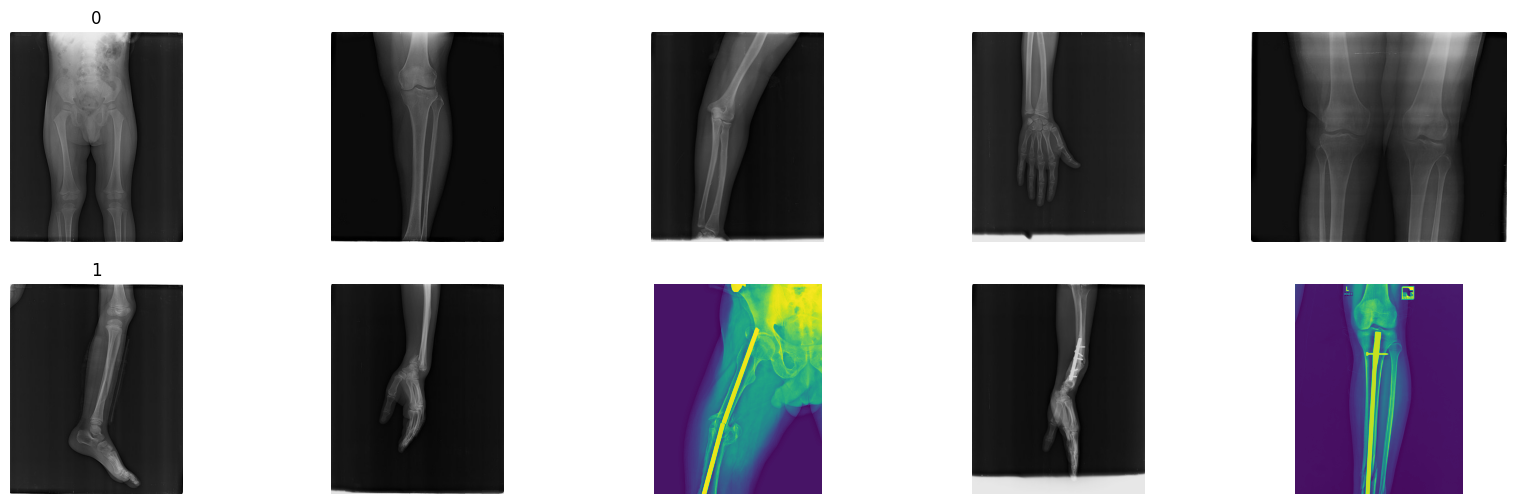

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         test_df.sort_values(['fractured']).groupby('fractured')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

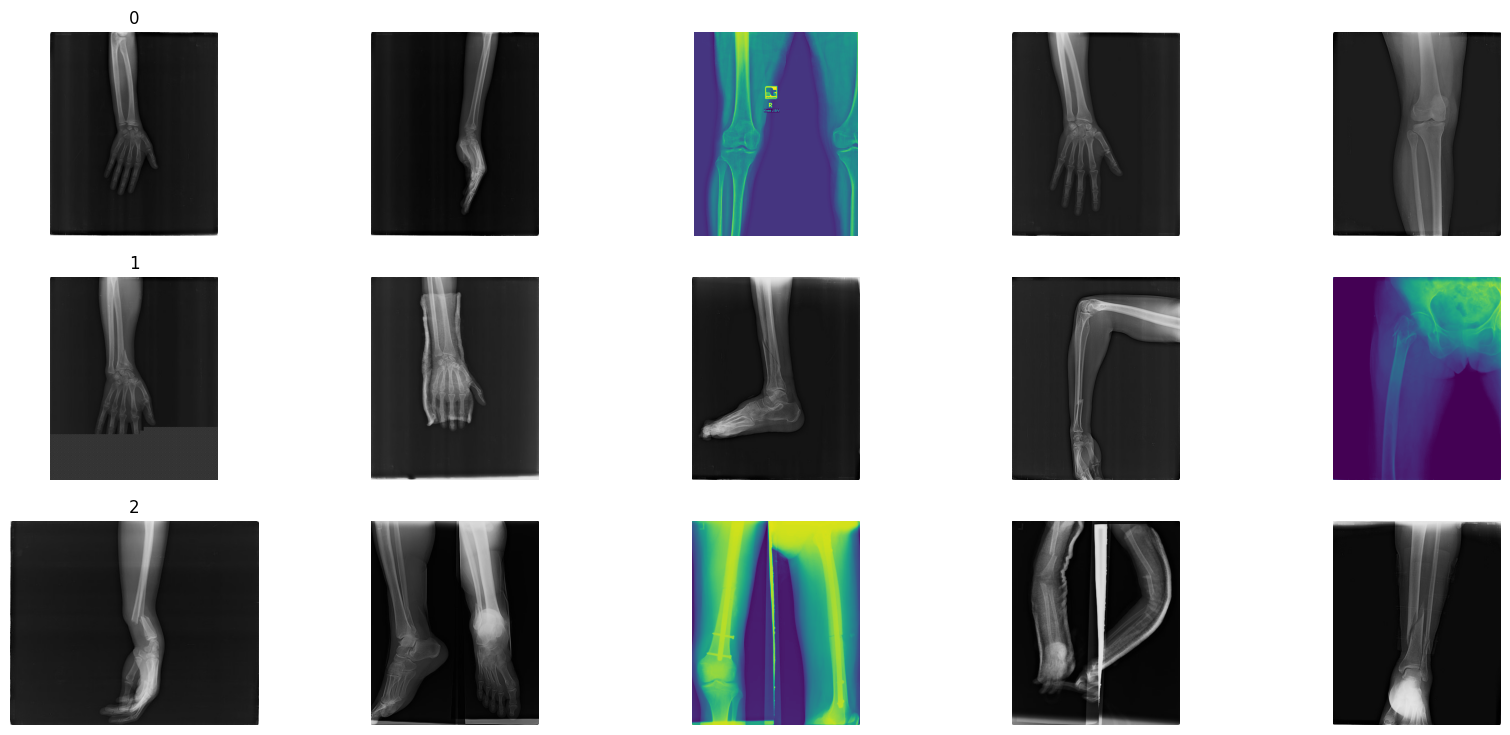

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(3, n_samples, figsize = (4*n_samples, 3*3))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         test_df.sort_values(['fracture_count']).groupby('fracture_count')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

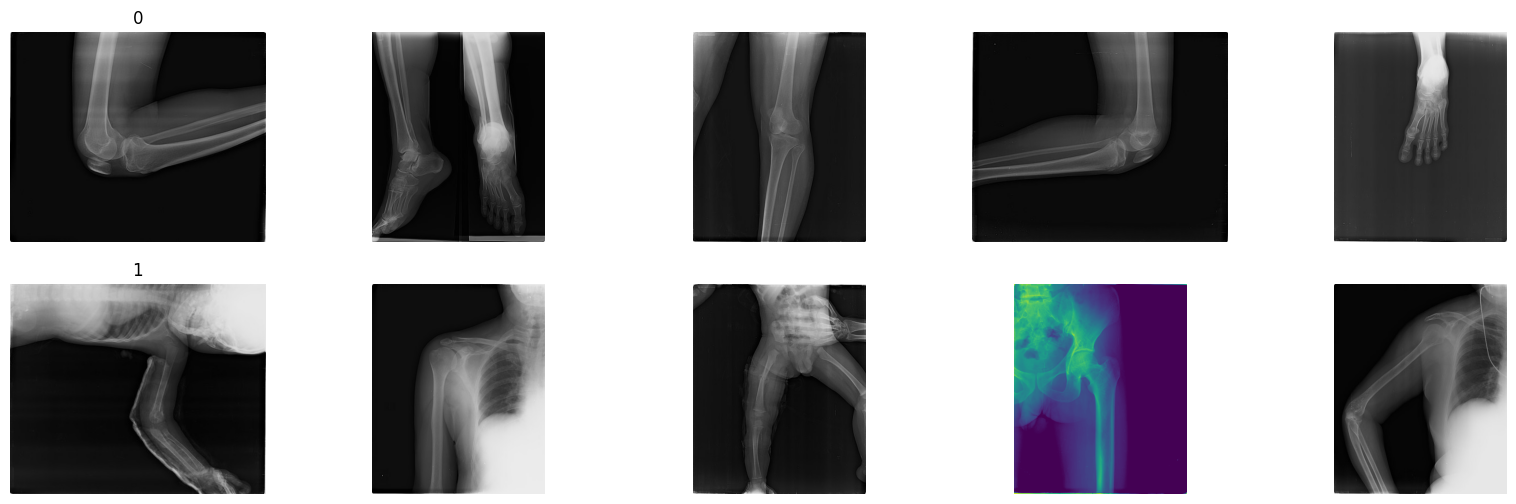

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         test_df.sort_values(['mixed']).groupby('mixed')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')